# 🚗 Análisis Exploratorio de Datos: Permisos de Circulación Arica 2025

## 📊 Resumen Ejecutivo

Este notebook contiene un análisis exploratorio de datos (EDA) sobre los permisos de circulación de vehículos en Arica para el año 2025. El objetivo es comprender las características principales de los datos, identificar patrones, detectar anomalías y extraer insights relevantes que puedan informar decisiones futuras.

> **Nota**: Los datos analizados corresponden a marzo de 2025 y proporcionan información valiosa sobre los vehículos, sus características y los montos pagados por permisos de circulación.

## 📑 Contenido
1. 🛠️ Configuración del entorno
2. 📥 Carga y preparación de datos
3. 🔍 Exploración inicial
4. ❓ Análisis de valores faltantes
5. 📊 Distribución de variables
6. 🔗 Análisis de correlaciones
7. 📈 Análisis bivariado
8. 💡 Conclusiones y próximos pasos

In [ ]:
## 1. 🛠️ Configuración del Entorno

#En esta sección preparamos el entorno de trabajo instalando y cargando todas las librerías necesarias para nuestro análisis.

#> **Nota**: Para instalar cualquiera de estas librerías, descomente la línea correspondiente y ejecute la celda.

#Primero, instalamos las librerías necesarias para el análisis. Descomente las líneas si necesita instalar alguna librería.

# Instalar librerias necesarias
#! pip install pandas
#! pip install numpy
#! pip install matplotlib
#! pip install seaborn
#! pip install scikit-learn
#! pip install plotly

In [7]:
# Importar librerías necesarias
import pandas as pd               # Para manipulación de datos
import numpy as np                # Para cálculos numéricos
import matplotlib.pyplot as plt   # Para visualizaciones básicas
import seaborn as sns           # Para visualizaciones avanzadas
import plotly                     
import plotly.express as px       # Para gráficos interactivos

# Configuraciones para mejorar la visualización
sns.set(style="whitegrid")        # Estilo de gráficos de seaborn
plt.rcParams["figure.figsize"] = (12, 8)  # Tamaño predeterminado de gráficos
plt.rcParams['axes.titlesize'] = 14       # Tamaño de títulos
plt.rcParams['axes.labelsize'] = 12       # Tamaño de etiquetas
plt.rcParams['xtick.labelsize'] = 10      # Tamaño de etiquetas eje X
plt.rcParams['ytick.labelsize'] = 10      # Tamaño de etiquetas eje Y

# Configuración para mostrar todas las columnas y filas cuando sea necesario
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Configuración para formato de números
pd.options.display.float_format = '{:,.2f}'.format

### 📚 Importación de librerías y configuración de visualización

A continuación, importamos las librerías esenciales para nuestro análisis y configuramos los parámetros de visualización para obtener gráficos informativos y estéticamente agradables.

In [8]:
# Cambia la ruta al nombre de tu archivo
df = pd.read_csv('DATA-pcv-marzo-2025.csv', encoding='utf-8', sep=';')

# Vista rápida de los primeros registros
df.head()

,PATENTE,AÑO GIRO,AÑO FABRI.,MONTO PAGADO,TIPO PAGO,FECHA PAGO,MODULO ATENCION,TIPO VEHICULO,MARCA,MODELO,COLOR,CODIGO SII
0,AA1739,2025,1977,33715,TOTAL,45717,WEB,CAMIONETA,CHEVROLET,CC-10703,CREMA,CT500005
1,BKRC92,2024,2009,17686,2° Cuota,45717,WEB,furgón,CHANGAN,CARGO VAN,BLANCO,CO470001
2,BKRC92,2025,2009,16858,1°Cuota,45717,WEB,furgón,CHANGAN,CARGO VAN,BLANCO,CO470001
3,BPBJ23,2025,2008,33715,TOTAL,45717,WEB,STATION WAGON,MAZDA,CX7,ROJO,SU1600028
4,BPBL98,2025,2007,33715,TOTAL,45717,WEB,AUTOMOVIL,CHRYSLER,SEBRING TOURING,BLANCO,SD510039


## 2. 📥 Carga y Preparación de Datos

En esta sección cargamos el dataset de permisos de circulación y realizamos la preparación inicial necesaria para facilitar el análisis posterior:

- Lectura del archivo CSV
- Exploración de las primeras filas para verificar la carga
- Limpieza y estandarización de nombres de columnas 
- Conversión de tipos de datos

> **Importancia**: La preparación adecuada de los datos es fundamental para evitar errores durante el análisis y garantizar resultados confiables.

In [9]:
# Cargar los datos desde el archivo CSV
print("Cargando datos de permisos de circulación...")
df = pd.read_csv('DATA-pcv-marzo-2025.csv', encoding='utf-8', sep=';')

# Mostrar las primeras filas para verificar la carga correcta
print("\nPrimeras 5 filas del dataset:")
df.head()

Cargando datos de permisos de circulación...

Primeras 5 filas del dataset:


,PATENTE,AÑO GIRO,AÑO FABRI.,MONTO PAGADO,TIPO PAGO,FECHA PAGO,MODULO ATENCION,TIPO VEHICULO,MARCA,MODELO,COLOR,CODIGO SII
0,AA1739,2025,1977,33715,TOTAL,45717,WEB,CAMIONETA,CHEVROLET,CC-10703,CREMA,CT500005
1,BKRC92,2024,2009,17686,2° Cuota,45717,WEB,furgón,CHANGAN,CARGO VAN,BLANCO,CO470001
2,BKRC92,2025,2009,16858,1°Cuota,45717,WEB,furgón,CHANGAN,CARGO VAN,BLANCO,CO470001
3,BPBJ23,2025,2008,33715,TOTAL,45717,WEB,STATION WAGON,MAZDA,CX7,ROJO,SU1600028
4,BPBL98,2025,2007,33715,TOTAL,45717,WEB,AUTOMOVIL,CHRYSLER,SEBRING TOURING,BLANCO,SD510039


### 🔎 Exploración inicial del dataset

En esta vista preliminar podemos observar las primeras filas del conjunto de datos, lo que nos permite comprender la estructura general y los tipos de información disponibles. Podemos ver datos como patentes, años, montos pagados, tipos de vehículos, marcas y modelos.

In [10]:
# Limpieza y preparación de los nombres de columnas
print("Nombres de columnas originales:")
print(df.columns.tolist())

# Reemplazar espacios en nombres de columnas por guiones bajos
df.columns = df.columns.str.replace(' ', '_')

# Convertir todos los nombres de columnas a mayúsculas para mantener consistencia
df.columns = df.columns.str.upper()

print("\nNombres de columnas después de la limpieza:")
print(df.columns.tolist())

# Verificar posibles duplicados en el dataset
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")


Nombres de columnas originales:
['PATENTE', 'AÑO GIRO', 'AÑO FABRI.', 'MONTO PAGADO', 'TIPO PAGO', 'FECHA PAGO', 'MODULO ATENCION', 'TIPO VEHICULO', 'MARCA', 'MODELO', 'COLOR', 'CODIGO SII']

Nombres de columnas después de la limpieza:
['PATENTE', 'AÑO_GIRO', 'AÑO_FABRI.', 'MONTO_PAGADO', 'TIPO_PAGO', 'FECHA_PAGO', 'MODULO_ATENCION', 'TIPO_VEHICULO', 'MARCA', 'MODELO', 'COLOR', 'CODIGO_SII']

Número de filas duplicadas: 0


### 🧹 Limpieza de nombres de columnas y verificación de duplicados

A continuación, estandarizamos los nombres de columnas (eliminando espacios y usando mayúsculas) para facilitar el acceso a los datos y evitar errores. También verificamos la presencia de registros duplicados que podrían afectar nuestro análisis.

In [11]:
# Convertir tipos de datos apropiados
print("Convirtiendo tipos de datos...")

# Convertir columnas numéricas
try:
    df['AÑO_FABRI.'] = pd.to_numeric(df['AÑO_FABRI.'], errors='coerce')
    df['AÑO_GIRO'] = pd.to_numeric(df['AÑO_GIRO'], errors='coerce')
    df['MONTO_PAGADO'] = pd.to_numeric(df['MONTO_PAGADO'], errors='coerce')
    
    # Convertir FECHA_PAGO a datetime si está en formato adecuado
    if df['FECHA_PAGO'].dtype == 'object':
        # Intentar convertir desde diferentes formatos posibles
        try:
            df['FECHA_PAGO'] = pd.to_datetime(df['FECHA_PAGO'], errors='coerce')
        except:
            print("No se pudo convertir FECHA_PAGO a formato fecha. Revise el formato de los datos.")
    
    print("Conversión de tipos completada")
except Exception as e:
    print(f"Error en la conversión de tipos: {e}")

# Mostrar los tipos de datos actualizados
print("\nTipos de datos después de la conversión:")
print(df.dtypes)

Convirtiendo tipos de datos...
Conversión de tipos completada

Tipos de datos después de la conversión:
PATENTE            object
AÑO_GIRO            int64
AÑO_FABRI.          int64
MONTO_PAGADO        int64
TIPO_PAGO          object
FECHA_PAGO          int64
MODULO_ATENCION    object
TIPO_VEHICULO      object
MARCA              object
MODELO             object
COLOR              object
CODIGO_SII         object
dtype: object


### 🔄 Conversión de tipos de datos

Para realizar análisis numéricos y temporales adecuados, convertimos las columnas a sus tipos de datos correspondientes:
- Los años y montos se convierten a formato numérico
- Las fechas se transforman al formato datetime para permitir análisis temporales
- Utilizamos el parámetro `errors='coerce'` para manejar valores problemáticos sin interrumpir el proceso

In [12]:
# Información general del dataset
print("="*50)
print("RESUMEN DEL DATASET")
print("="*50)

# Dimensiones del dataset
filas, columnas = df.shape
print(f"Dimensiones: {filas} filas x {columnas} columnas")

# Memoria utilizada
memoria = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Memoria utilizada: {memoria:.2f} MB")

# Mostrar información detallada
print("\n--- Información detallada ---")
df.info()

print("\n--- Estadísticas descriptivas para variables numéricas ---")
df.describe().T

# Mostrar una muestra aleatoria de 5 registros
print("\n--- Muestra aleatoria de 5 registros ---")
df.sample(5)


RESUMEN DEL DATASET
Dimensiones: 45875 filas x 12 columnas
Memoria utilizada: 21.26 MB

--- Información detallada ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45875 entries, 0 to 45874
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PATENTE          45875 non-null  object
 1   AÑO_GIRO         45875 non-null  int64 
 2   AÑO_FABRI.       45875 non-null  int64 
 3   MONTO_PAGADO     45875 non-null  int64 
 4   TIPO_PAGO        45875 non-null  object
 5   FECHA_PAGO       45875 non-null  int64 
 6   MODULO_ATENCION  45875 non-null  object
 7   TIPO_VEHICULO    45875 non-null  object
 8   MARCA            45875 non-null  object
 9   MODELO           45875 non-null  object
 10  COLOR            45875 non-null  object
 11  CODIGO_SII       45875 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.2+ MB

--- Estadísticas descriptivas para variables numéricas ---

--- Muestra aleatoria de 5 regis

,PATENTE,AÑO_GIRO,AÑO_FABRI.,MONTO_PAGADO,TIPO_PAGO,FECHA_PAGO,MODULO_ATENCION,TIPO_VEHICULO,MARCA,MODELO,COLOR,CODIGO_SII
45119,TDGV44,2025,2011,33715,TOTAL,45747,WEB,STATION WAGON,KIA MOTORS,SPORTAGE,GRIS,SU1320119
26955,LHKT47,2025,2012,16858,1°Cuota,45743,WEB,STATION WAGON,SUZUKI,SX4,NEGRO,SU2290246
3035,HSJB86,2025,2002,16858,1°Cuota,45722,WEB,STATION WAGON,MAZDA,DEMIO,AMARILLO,SU1600018
10352,RZRK53,2024,2022,630944,2° Cuota,45732,WEB,STATION WAGON,CHEVROLET,BLAZER 4X4,NEGRO,SU500136
4515,JYTD36,2025,2009,33715,TOTAL,45724,WEB,AUTOMOVIL,MAZDA,DEMIO,CAFE MARRON,HB1600040


### 📝 Interpretación del resumen

El resumen anterior nos proporciona una visión general del dataset:

- **Tamaño del dataset**: Tenemos una cantidad considerable de registros que representan permisos de circulación en Arica.
- **Tipos de datos**: Identificamos variables numéricas (montos, años) y categóricas (marcas, tipos de vehículos).
- **Estadísticas básicas**: Las medidas descriptivas nos muestran la distribución de las variables numéricas, incluyendo promedios, medianas y rangos.

Estos datos servirán como base para análisis más específicos en las siguientes secciones.

## 3. 🔍 Exploración Inicial de los Datos

En esta sección realizamos una exploración profunda para entender la estructura y características generales del dataset. Esto incluye:

- 📏 **Dimensiones**: Cantidad de filas y columnas
- 💾 **Uso de memoria**: Espacio ocupado por los datos
- 📋 **Información de columnas**: Tipos de datos y valores no nulos
- 📊 **Estadísticas descriptivas**: Medidas de tendencia central y dispersión
- 🎲 **Muestreo aleatorio**: Ejemplos representativos de los datos

> **Objetivo**: Obtener una comprensión holística del dataset antes de realizar análisis específicos.

In [13]:
# Análisis completo de valores faltantes
print("="*50)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*50)

# Conteo de valores nulos por columna
nulos_por_columna = df.isnull().sum()
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100

# Crear un DataFrame para mostrar mejor la información
resumen_nulos = pd.DataFrame({
    'Valores Nulos': nulos_por_columna,
    'Porcentaje (%)': porcentaje_nulos
})

# Ordenar por cantidad de nulos (descendente)
resumen_nulos = resumen_nulos.sort_values('Valores Nulos', ascending=False)

# Mostrar solo columnas con al menos un valor nulo
print(resumen_nulos[resumen_nulos['Valores Nulos'] > 0])

# Si no hay valores nulos, mostrar un mensaje
if resumen_nulos['Valores Nulos'].sum() == 0:
    print("\nEl dataset no contiene valores nulos.")
else:
    # Visualización gráfica de nulos
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
    plt.title("Mapa de calor de valores nulos", fontsize=16)
    plt.xlabel("Columnas", fontsize=12)
    plt.ylabel("Filas", fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Gráfico de barras para mostrar porcentaje de nulos por columna
    plt.figure(figsize=(12, 6))
    resumen_nulos[resumen_nulos['Valores Nulos'] > 0]['Porcentaje (%)'].plot(kind='bar', color='crimson')
    plt.title("Porcentaje de valores nulos por columna", fontsize=16)
    plt.ylabel("Porcentaje (%)", fontsize=12)
    plt.xlabel("Columnas", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


ANÁLISIS DE VALORES FALTANTES
Empty DataFrame
Columns: [Valores Nulos, Porcentaje (%)]
Index: []

El dataset no contiene valores nulos.
Empty DataFrame
Columns: [Valores Nulos, Porcentaje (%)]
Index: []

El dataset no contiene valores nulos.


### 🔍 Interpretación de valores faltantes

El análisis anterior muestra la presencia (o ausencia) de valores faltantes en nuestro dataset. Esta información es crucial por varias razones:

- **Completitud de datos**: Un dataset sin valores faltantes o con pocos valores faltantes indica mayor calidad y confiabilidad.
- **Estrategia de imputación**: En caso de valores faltantes, debemos decidir si eliminarlos o imputarlos según su naturaleza y proporción.
- **Impacto en análisis**: Los valores faltantes pueden afectar significativamente los resultados de nuestros análisis si no son manejados correctamente.

Los resultados nos ayudarán a decidir las estrategias de preprocesamiento para análisis posteriores.

## 4. ❓ Análisis de Valores Faltantes

La identificación y gestión de valores faltantes es un paso crítico en cualquier análisis de datos. En esta sección:

- 🔢 Cuantificamos los valores nulos por columna
- 📊 Visualizamos su distribución mediante mapas de calor
- 📏 Calculamos el porcentaje que representan sobre el total
- 🧩 Evaluamos su impacto potencial en el análisis

> **Importancia**: Los valores faltantes pueden introducir sesgos en nuestros análisis si no se identifican y manejan adecuadamente.

ANÁLISIS DE VARIABLES NUMÉRICAS
Variables numéricas: ['AÑO_GIRO', 'AÑO_FABRI.', 'MONTO_PAGADO', 'FECHA_PAGO']

Estadísticas detalladas de variables numéricas:
                 count      mean       std       min        5%       25%  \
AÑO_GIRO     45,875.00  2,024.86      0.91  2,000.00  2,024.00  2,025.00   
AÑO_FABRI.   45,875.00  2,009.65      6.72  1,930.00  1,999.00  2,006.00   
MONTO_PAGADO 45,875.00 42,210.28 48,594.80      0.00 16,858.00 33,715.00   
FECHA_PAGO   45,875.00 45,738.42      8.47 45,717.00 45,721.00 45,733.00   

                   50%       75%       95%          max        rango   IQR  \
AÑO_GIRO      2,025.00  2,025.00  2,025.00     2,025.00        25.00  0.00   
AÑO_FABRI.    2,010.00  2,014.00  2,021.00     2,025.00        95.00  8.00   
MONTO_PAGADO 33,715.00 33,715.00 94,539.00 2,481,770.00 2,481,770.00  0.00   
FECHA_PAGO   45,741.00 45,746.00 45,747.00    45,747.00        30.00 13.00   

               skew   kurt  
AÑO_GIRO     -13.04 228.98  
AÑO_FABRI. 

<Figure size 1600x1000 with 0 Axes>

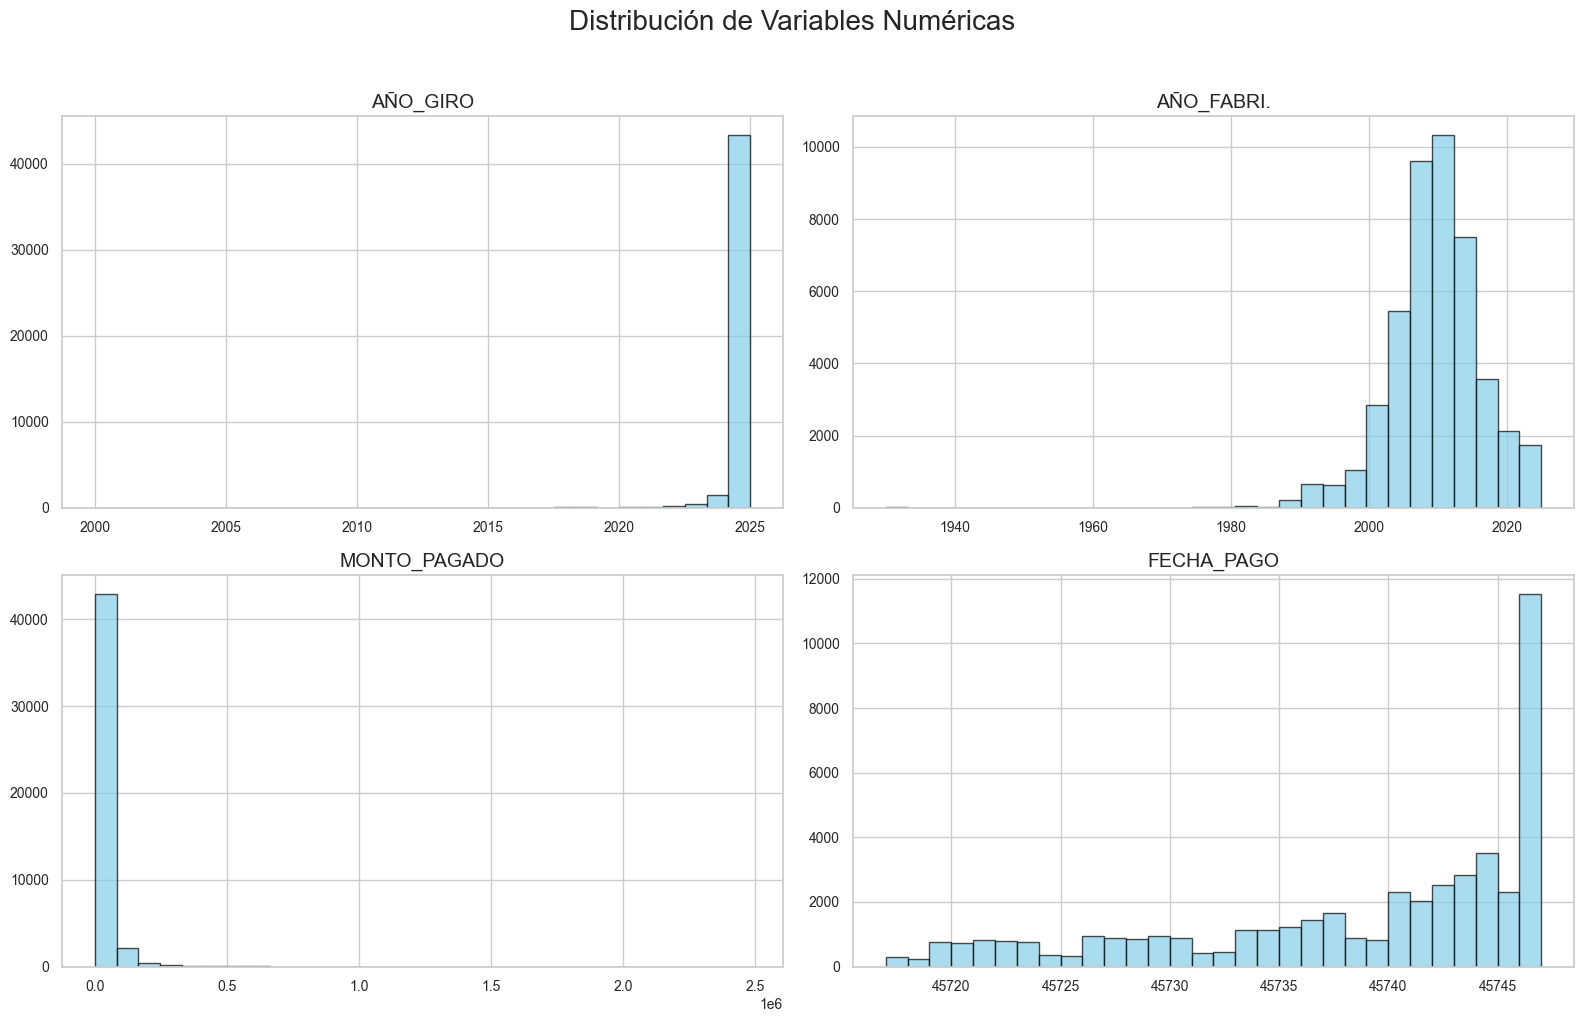

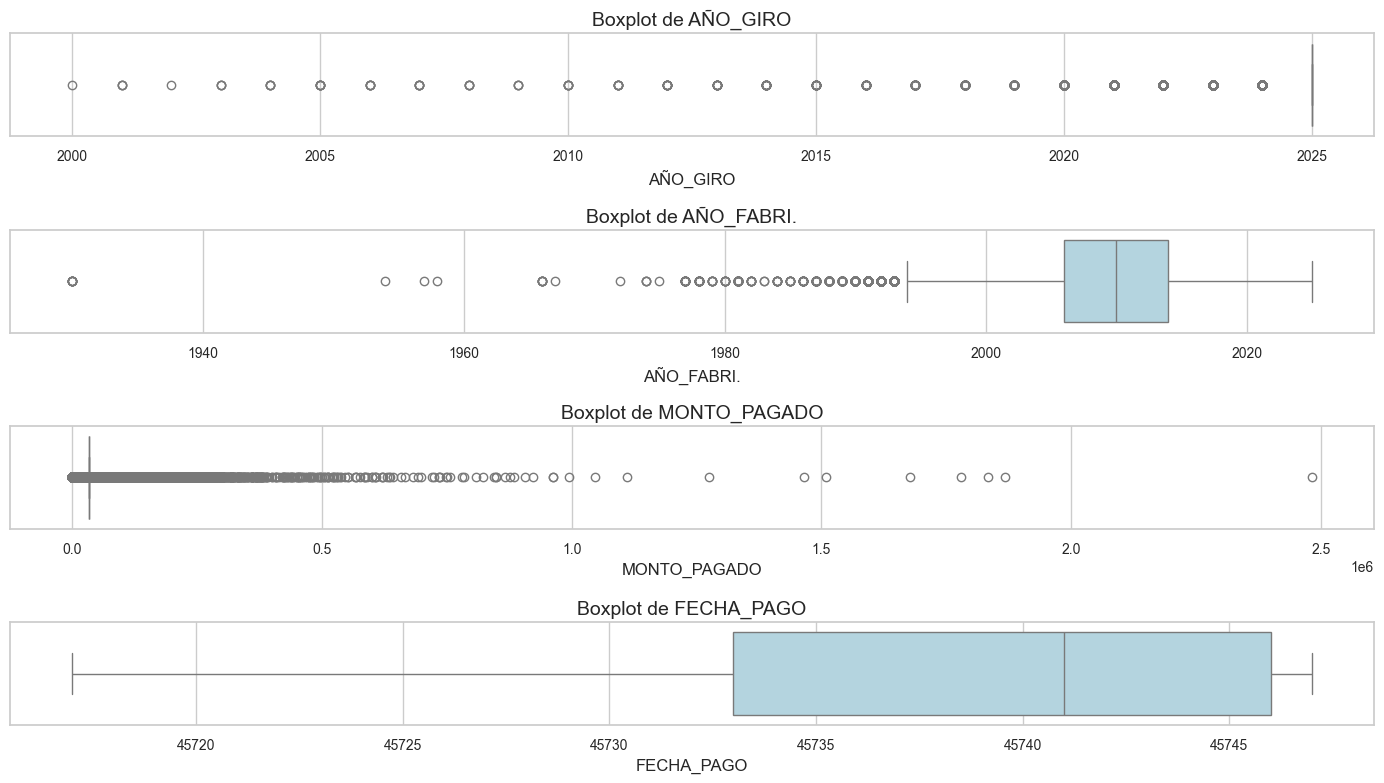

PATENTE: 43656 valores únicos
TIPO_PAGO: 3 valores únicos
MODULO_ATENCION: 2 valores únicos
TIPO_VEHICULO: 35 valores únicos
MARCA: 320 valores únicos
MODELO: 9354 valores únicos
COLOR: 1228 valores únicos
CODIGO_SII: 6119 valores únicos


In [14]:
# Análisis de variables numéricas
print("="*50)
print("ANÁLISIS DE VARIABLES NUMÉRICAS")
print("="*50)

# Identificar variables numéricas
numericas = df.select_dtypes(include=['number']).columns.tolist()
print(f"Variables numéricas: {numericas}")

# Estadísticas detalladas
print("\nEstadísticas detalladas de variables numéricas:")
stats_numericas = df[numericas].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).T
stats_numericas['rango'] = stats_numericas['max'] - stats_numericas['min']
stats_numericas['IQR'] = stats_numericas['75%'] - stats_numericas['25%']
stats_numericas['skew'] = df[numericas].skew()
stats_numericas['kurt'] = df[numericas].kurtosis()
print(stats_numericas)

# Crear histogramas para cada variable numérica
plt.figure(figsize=(16, 10))
df[numericas].hist(bins=30, figsize=(16, 10), color="skyblue", edgecolor='black', alpha=0.7, layout=(len(numericas)//2 + len(numericas)%2, 2))
plt.suptitle("Distribución de Variables Numéricas", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# Crear boxplots para identificar outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(numericas):
    plt.subplot(len(numericas), 1, i+1)
    sns.boxplot(x=df[col], color='lightblue', orient='h')
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show()

# Valores únicos por columna
for col in df.select_dtypes(include='object'):
    print(f"{col}: {df[col].nunique()} valores únicos")



### 🔢 Interpretación de las distribuciones numéricas

Los gráficos y estadísticas anteriores revelan características importantes sobre nuestras variables numéricas:

- **MONTO_PAGADO**: Observamos la distribución de los montos pagados por permisos de circulación, identificando posibles patrones o agrupaciones de precios.
  
- **AÑO_FABRI**: La distribución de años de fabricación nos muestra la antigüedad del parque vehicular en Arica, con implicaciones para políticas públicas y medioambientales.

- **Outliers**: Los boxplots nos permiten identificar valores atípicos que podrían representar casos especiales o errores en los datos.

- **Asimetría**: Los valores de skewness nos indican si las distribuciones están sesgadas hacia valores altos o bajos, lo que afecta la elección de estadísticos apropiados.

### 5.2 📊 Distribución de Variables Categóricas

Las variables categóricas como marcas, modelos y tipos de vehículos nos permiten segmentar y entender la composición del parque vehicular en Arica.

En esta sección analizamos:
- 🚗 **Frecuencia de marcas**: Para identificar las más populares
- 🚙 **Tipos de vehículos**: Para entender la composición del parque automotor
- 🎨 **Colores**: Para conocer las preferencias estéticas
- 📍 **Módulos de atención**: Para evaluar los canales de pago más utilizados

Utilizamos gráficos de barras y tablas de frecuencia para visualizar estas distribuciones, enfocándonos en los valores más comunes para variables con muchas categorías.

ANÁLISIS DE VARIABLES CATEGÓRICAS
Variables categóricas: ['PATENTE', 'TIPO_PAGO', 'MODULO_ATENCION', 'TIPO_VEHICULO', 'MARCA', 'MODELO', 'COLOR', 'CODIGO_SII']

Número de valores únicos por variable categórica:
PATENTE: 43656 valores únicos

Top 10 valores más frecuentes para PATENTE:
PATENTE
AA6967   0.04
GVRV95   0.02
LV1623   0.02
GCSL41   0.02
KK0405   0.02
BSCT31   0.02
GL0989   0.02
AA7558   0.02
KR1518   0.02
FZBR28   0.02
Name: proportion, dtype: float64


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


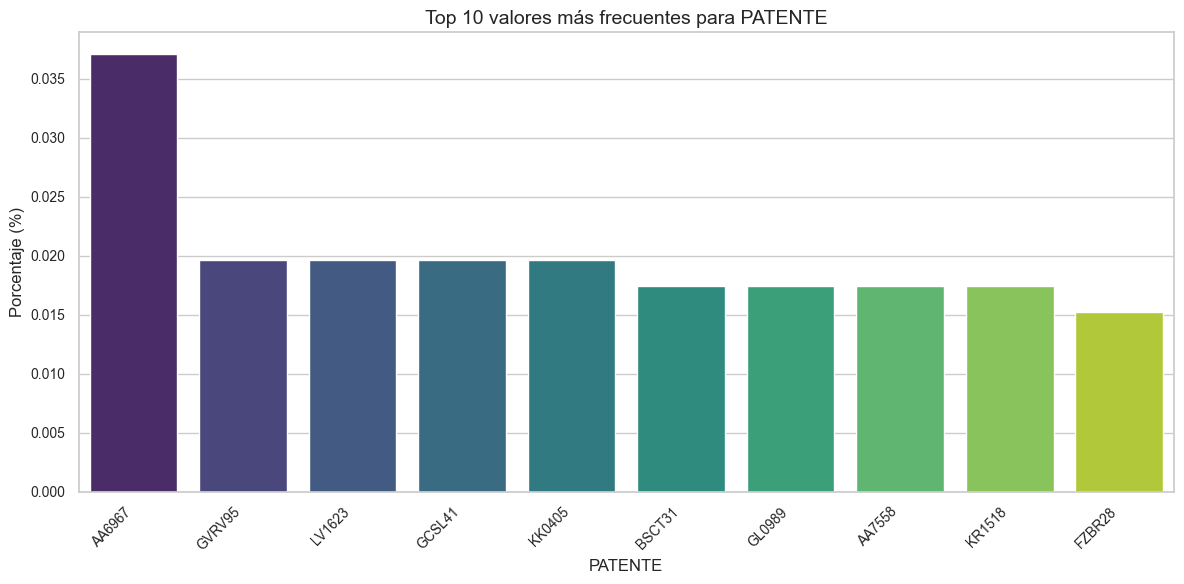


------------------------------
TIPO_PAGO: 3 valores únicos

Distribución de TIPO_PAGO:
  TIPO_PAGO  Porcentaje
0     TOTAL       86.87
1   1°Cuota       11.90
2  2° Cuota        1.22


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Porcentaje', data=distribucion.head(10), palette='viridis')


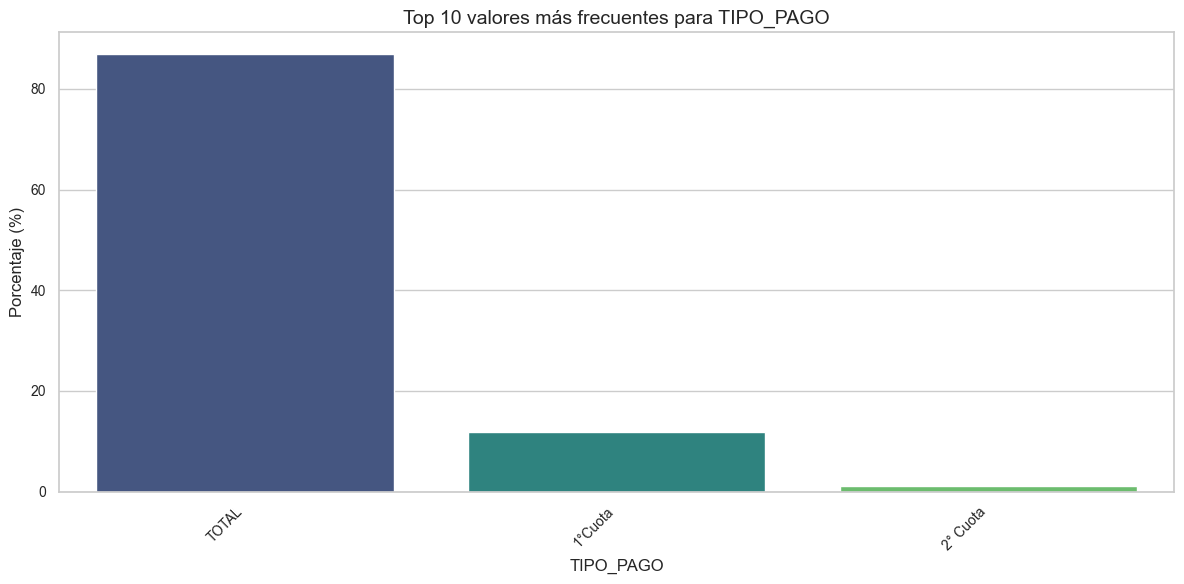

C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Porcentaje', data=distribucion.head(10), palette='viridis')



------------------------------
MODULO_ATENCION: 2 valores únicos

Distribución de MODULO_ATENCION:
  MODULO_ATENCION  Porcentaje
0             WEB       94.77
1      Presencial        5.23


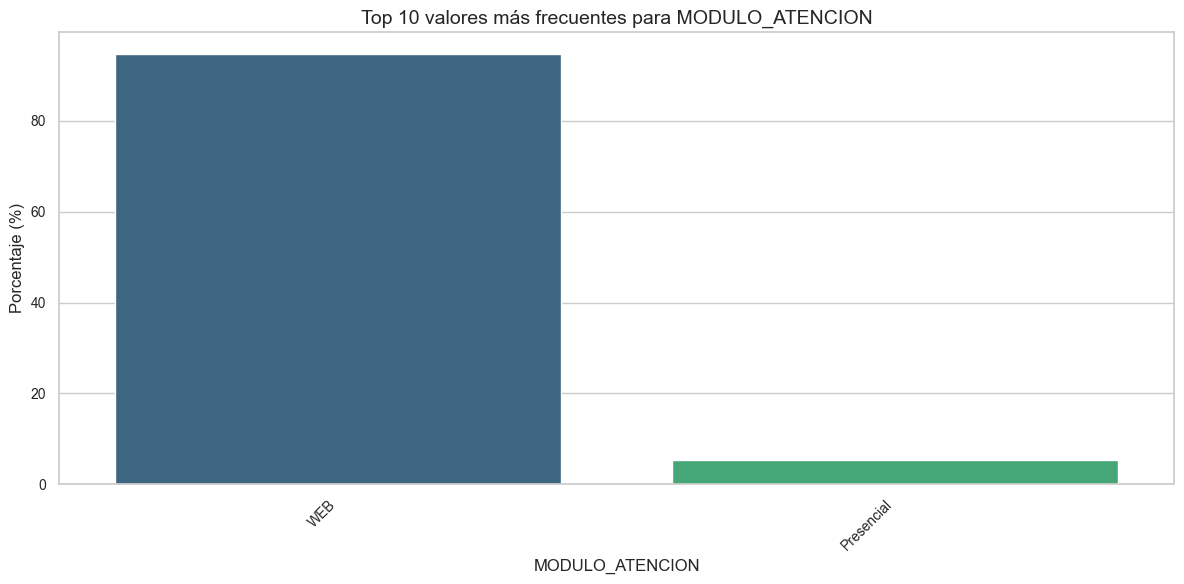


------------------------------
TIPO_VEHICULO: 35 valores únicos

Top 10 valores más frecuentes para TIPO_VEHICULO:
TIPO_VEHICULO
STATION WAGON        57.64
AUTOMOVIL            23.80
CAMIONETA            13.52
MOTO                  1.86
MINIBUS_PARTICULAR    0.54
JEEP                  0.52
furgón                0.45
TAXI TURISMO          0.45
CAMION                0.20
Carro de Arrastre     0.19
Name: proportion, dtype: float64


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


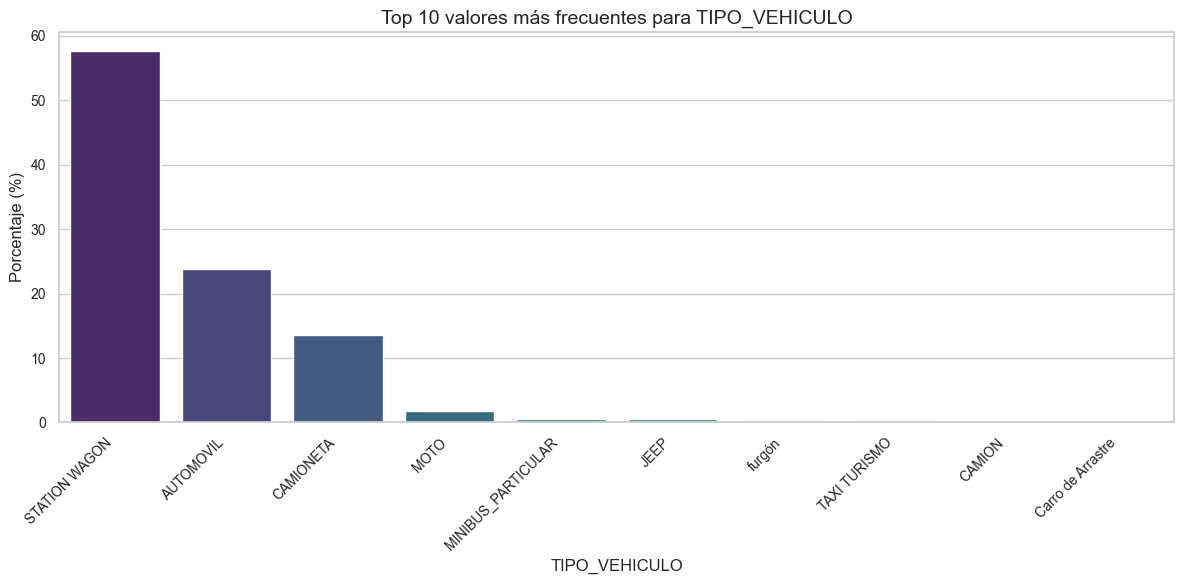


------------------------------
MARCA: 320 valores únicos

Top 10 valores más frecuentes para MARCA:
MARCA
HYUNDAI      22.81
MAZDA        11.01
KIA MOTORS   10.07
HONDA         8.77
NISSAN        6.93
CHEVROLET     5.05
TOYOTA        4.40
SUZUKI        3.49
MITSUBISHI    3.22
FORD          2.14
Name: proportion, dtype: float64


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


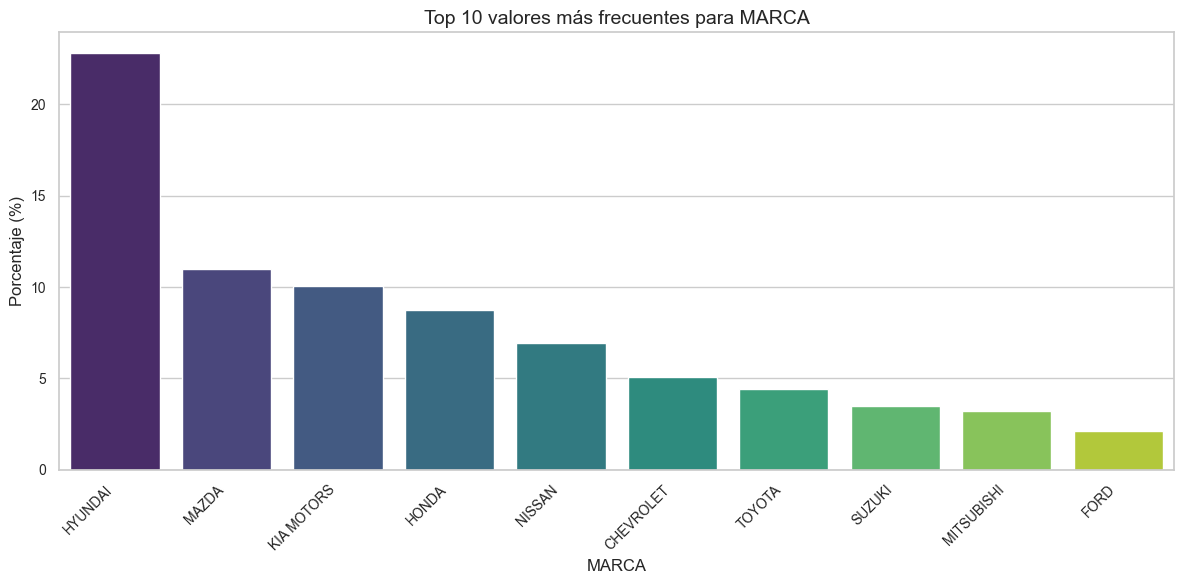


------------------------------
MODELO: 9354 valores únicos

Top 10 valores más frecuentes para MODELO:
MODELO
DEMIO       2.97
DEMIO       2.40
FIT         2.32
FIT         2.25
SPORTAGE    1.85
TUCSON      1.80
TUCSON      1.72
PORTER      1.69
SANTA FE    1.19
SPORTAGE    1.18
Name: proportion, dtype: float64


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


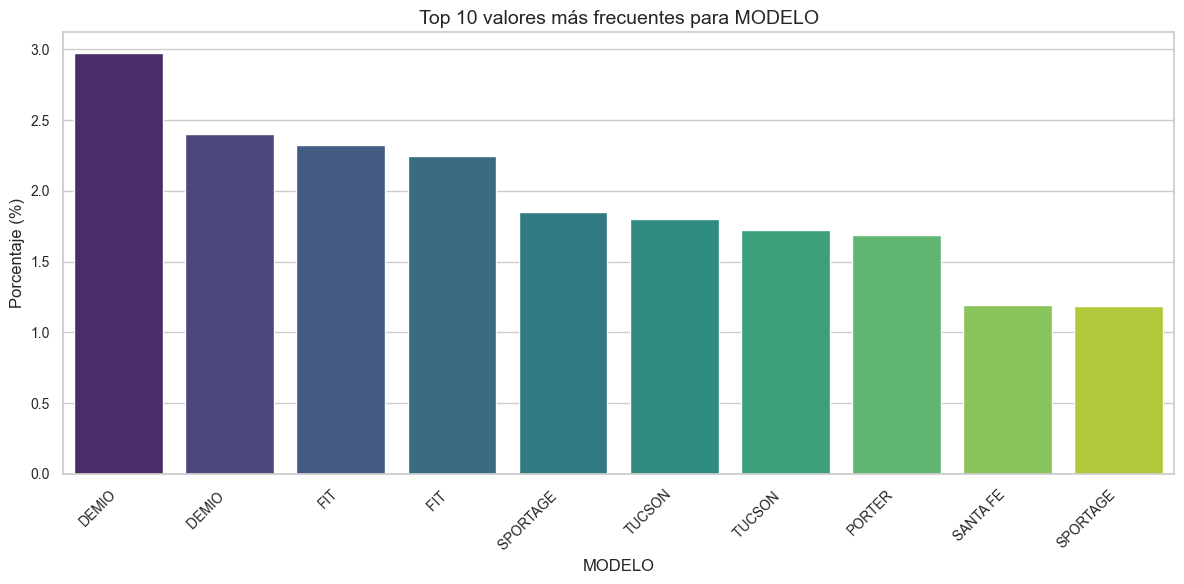


------------------------------
COLOR: 1228 valores únicos

Top 10 valores más frecuentes para COLOR:
COLOR
BLANCO           20.97
GRIS             11.96
PLATEADO         11.61
AZUL             10.64
NEGRO            10.33
ROJO              6.39
PLATEADO PLATA    2.79
BLANCO PERLA      2.42
ROJO BURDEO       1.71
VERDE             1.68
Name: proportion, dtype: float64


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


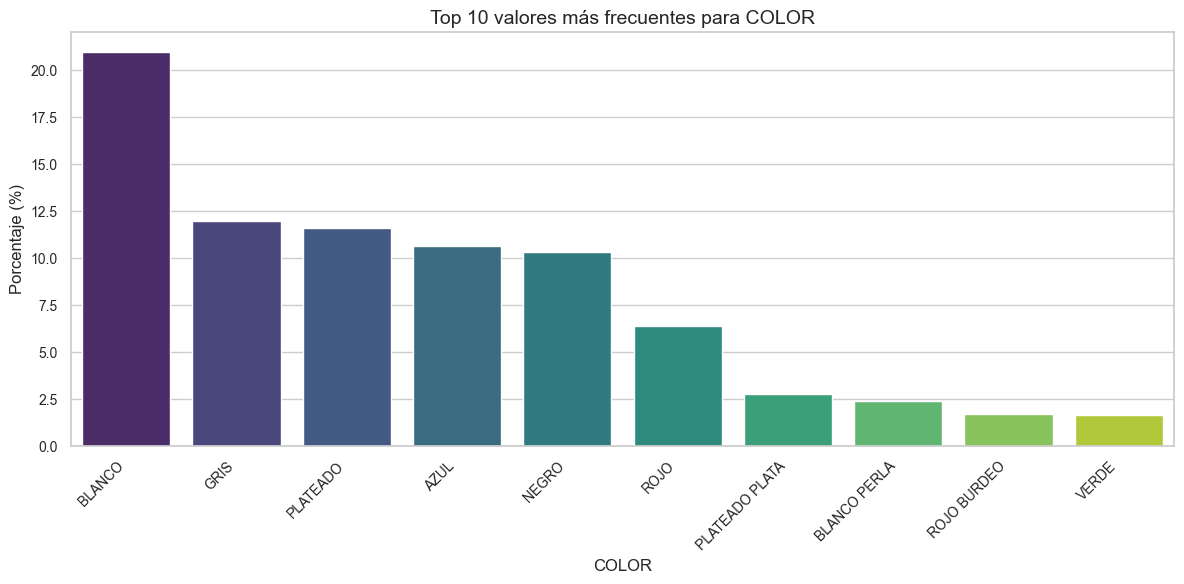


------------------------------
CODIGO_SII: 6119 valores únicos

Top 10 valores más frecuentes para CODIGO_SII:
CODIGO_SII
HB1060024   3.71
HB1600040   1.71
HB1060026   1.48
SU1320119   1.48
HB1760056   1.18
SD1600184   1.16
            1.13
SU1110052   1.12
SD1600177   1.05
HB1060021   0.98
Name: proportion, dtype: float64


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\2025288623.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')


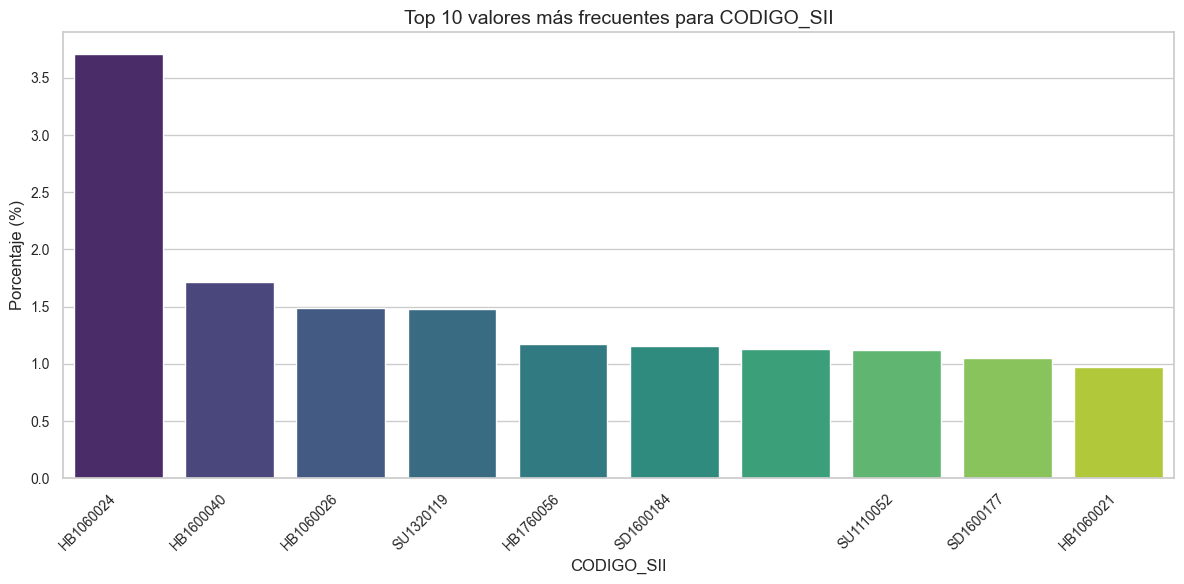


------------------------------


In [15]:
# Análisis de variables categóricas
print("="*50)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*50)

# Identificar variables categóricas (object)
categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas: {categoricas}")

# Análisis de valores únicos
print("\nNúmero de valores únicos por variable categórica:")
for col in categoricas:
    n_valores = df[col].nunique()
    print(f"{col}: {n_valores} valores únicos")
    
    # Mostrar distribución de las variables con menos de 20 valores únicos
    if n_valores < 20:
        print(f"\nDistribución de {col}:")
        distribucion = df[col].value_counts(normalize=True).reset_index()
        distribucion.columns = [col, 'Porcentaje']
        distribucion['Porcentaje'] = distribucion['Porcentaje'] * 100
        print(distribucion.head(10))
        
        # Gráfico de barras
        plt.figure(figsize=(12, 6))
        sns.barplot(x=col, y='Porcentaje', data=distribucion.head(10), palette='viridis')
        plt.title(f'Top 10 valores más frecuentes para {col}', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Porcentaje (%)')
        plt.tight_layout()
        plt.show()
    else:
        # Para variables con muchos valores únicos, mostrar solo top 10
        print(f"\nTop 10 valores más frecuentes para {col}:")
        print(df[col].value_counts(normalize=True).head(10) * 100)
        
        # Gráfico de barras para top 10
        plt.figure(figsize=(12, 6))
        top_10 = df[col].value_counts(normalize=True).head(10) * 100
        sns.barplot(x=top_10.index, y=top_10.values, palette='viridis')
        plt.title(f'Top 10 valores más frecuentes para {col}', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Porcentaje (%)')
        plt.tight_layout()
        plt.show()
    
    print("\n" + "-"*30)

### 🔍 Interpretación de las distribuciones categóricas

El análisis de variables categóricas nos revela información valiosa sobre las preferencias y características del parque vehicular en Arica:

- **Marcas dominantes**: Identificamos las marcas con mayor presencia, lo que refleja preferencias locales y podría relacionarse con factores económicos o de disponibilidad.

- **Tipos de vehículos**: La distribución de tipos (automóviles, camionetas, SUVs, etc.) nos muestra las tendencias de movilidad en la región.

- **Diversidad de categorías**: Algunas variables como MODELO tienen muchas categorías únicas, lo que requeriría agrupación para análisis más profundos.

- **Segmentación potencial**: Estas categorías proporcionan bases para segmentación en análisis posteriores, como modelos predictivos o análisis de clusters.

## 5. 📊 Distribución de Variables

Comprender la distribución de nuestras variables es fundamental para seleccionar los análisis estadísticos adecuados y detectar patrones importantes. En esta sección exploramos:

- 📈 **Variables numéricas**: Analizamos su forma, tendencia central y dispersión
- 📊 **Variables categóricas**: Examinamos frecuencias y proporciones de cada categoría
- 📉 **Detección de outliers**: Identificamos valores atípicos que podrían afectar nuestros análisis
- 🔄 **Transformaciones potenciales**: Evaluamos si es necesario transformar variables para análisis posteriores

> **Objetivo**: Entender la naturaleza intrínseca de cada variable para informar correctamente nuestras decisiones analíticas.

### 5.1 📈 Distribución de Variables Numéricas

Las variables numéricas como el monto pagado y los años de fabricación son fundamentales para entender las características económicas y temporales de los permisos de circulación.

A continuación, exploramos estas variables mediante:
- 📊 **Histogramas**: Para visualizar la forma de la distribución
- 📏 **Estadísticas descriptivas**: Para cuantificar tendencias centrales y dispersión
- 📦 **Boxplots**: Para identificar valores atípicos
- 🔢 **Análisis de asimetría y curtosis**: Para caracterizar la forma de la distribución

ANÁLISIS DE CORRELACIONES
Analizando correlaciones entre 4 variables numéricas


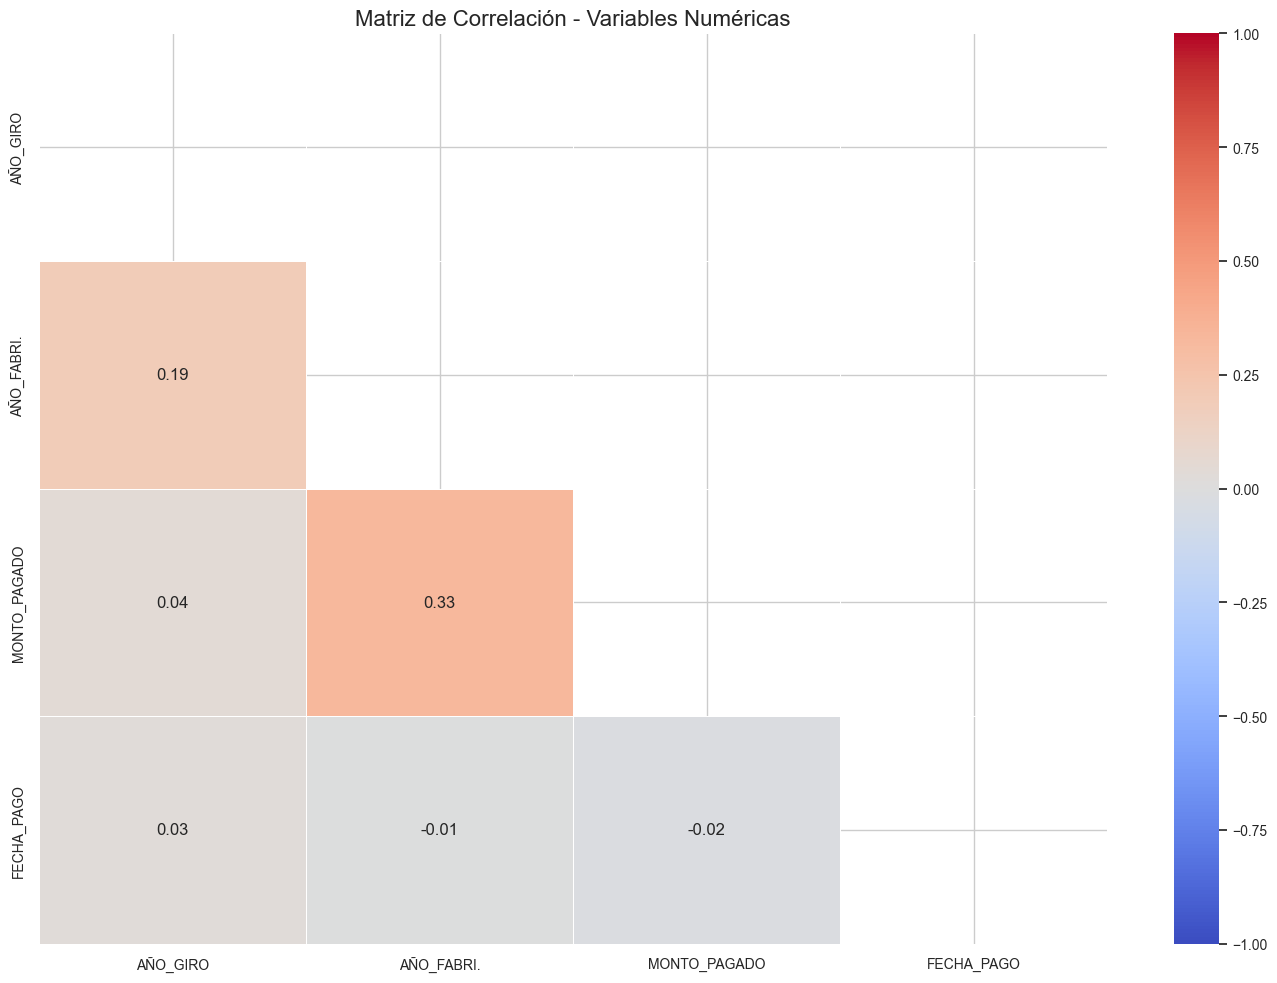


Correlaciones más fuertes (positivas):
AÑO_FABRI.    MONTO_PAGADO    0.33
MONTO_PAGADO  AÑO_FABRI.      0.33
AÑO_FABRI.    AÑO_GIRO        0.19
AÑO_GIRO      AÑO_FABRI.      0.19
              MONTO_PAGADO    0.04
MONTO_PAGADO  AÑO_GIRO        0.04
FECHA_PAGO    AÑO_GIRO        0.03
AÑO_GIRO      FECHA_PAGO      0.03
AÑO_FABRI.    FECHA_PAGO     -0.01
FECHA_PAGO    AÑO_FABRI.     -0.01
dtype: float64

Correlaciones más fuertes (negativas):
AÑO_FABRI.    AÑO_GIRO        0.19
AÑO_GIRO      AÑO_FABRI.      0.19
              MONTO_PAGADO    0.04
MONTO_PAGADO  AÑO_GIRO        0.04
FECHA_PAGO    AÑO_GIRO        0.03
AÑO_GIRO      FECHA_PAGO      0.03
AÑO_FABRI.    FECHA_PAGO     -0.01
FECHA_PAGO    AÑO_FABRI.     -0.01
MONTO_PAGADO  FECHA_PAGO     -0.02
FECHA_PAGO    MONTO_PAGADO   -0.02
dtype: float64


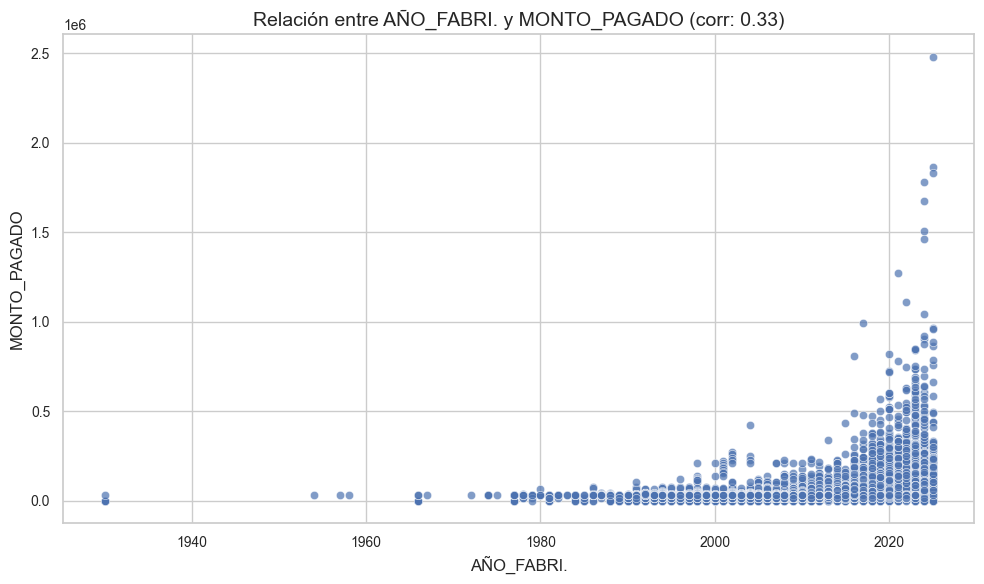

In [16]:
# Análisis de correlaciones entre variables numéricas
print("="*50)
print("ANÁLISIS DE CORRELACIONES")
print("="*50)

# Seleccionar solo variables numéricas
num_vars = df.select_dtypes(include=['number'])
print(f"Analizando correlaciones entre {len(num_vars.columns)} variables numéricas")

# Calcular matriz de correlación
correlation = num_vars.corr()

# Crear máscara para el triángulo superior (evita redundancia)
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Configurar el gráfico
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de Correlación - Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Identificar las correlaciones más fuertes (positivas y negativas)
print("\nCorrelaciones más fuertes (positivas):")
correlaciones = correlation.unstack().sort_values(ascending=False)
correlaciones = correlaciones[correlaciones < 1.0]  # Excluir autocorrelaciones
print(correlaciones.head(10))

print("\nCorrelaciones más fuertes (negativas):")
print(correlaciones.tail(10))

# Visualizar relaciones específicas de interés (ejemplo con las dos variables más correlacionadas)
if len(correlaciones) > 0:
    var1, var2 = correlaciones.index[0]
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var1, y=var2, alpha=0.7)
    plt.title(f"Relación entre {var1} y {var2} (corr: {correlation.loc[var1, var2]:.2f})")
    plt.tight_layout()
    plt.show()


### 🧠 Interpretación de correlaciones

La matriz de correlación y los análisis derivados nos proporcionan información valiosa sobre las relaciones entre variables numéricas:

- **Relaciones significativas**: Identificamos qué variables numéricas están más relacionadas entre sí, lo que puede orientar análisis más profundos.

- **AÑO_FABRI. y MONTO_PAGADO**: La relación entre el año de fabricación y el monto pagado nos indica cómo la antigüedad del vehículo influye en el costo del permiso.

- **Ausencia de correlaciones**: Variables con baja correlación podrían representar dimensiones independientes del dataset.

- **Multicolinealidad**: Correlaciones muy altas entre variables predictoras podrían indicar redundancia informativa, importante para futuros modelos predictivos.

Estas relaciones nos ayudan a entender mejor la estructura de los datos y a formular hipótesis para análisis posteriores.

## 7. 📈 Análisis Bivariado

El análisis bivariado nos permite explorar las relaciones entre pares de variables, proporcionando una comprensión más profunda de cómo interactúan entre sí. Nos enfocamos especialmente en las relaciones entre variables categóricas (como MARCA o TIPO_VEHICULO) y numéricas (como MONTO_PAGADO).

En esta sección:
- 🚗 **MARCA vs. MONTO_PAGADO**: Analizamos cómo varían los montos según la marca del vehículo
- 🚙 **TIPO_VEHICULO vs. MONTO_PAGADO**: Exploramos diferencias en montos según el tipo de vehículo
- 📅 **AÑO_FABRI. vs. MONTO_PAGADO**: Investigamos la relación entre antigüedad y monto pagado

> **Objetivo**: Identificar patrones, tendencias y diferencias significativas entre grupos que puedan informar decisiones y políticas relacionadas con los permisos de circulación.

## 6. 🔗 Análisis de Correlaciones

El análisis de correlaciones nos permite identificar relaciones lineales entre variables numéricas, revelando posibles dependencias o patrones.

En esta sección:
- 🔥 **Matriz de correlación**: Visualizamos todas las correlaciones simultáneamente mediante un mapa de calor
- 📊 **Correlaciones más fuertes**: Identificamos las relaciones lineales más significativas (positivas y negativas)
- 📈 **Gráficos de dispersión**: Exploramos visualmente las relaciones entre pares de variables clave
- 🔍 **Interpretación**: Analizamos el significado de estas relaciones en el contexto de permisos de circulación

> **Nota**: La correlación mide asociación lineal, no necesariamente causalidad. Un valor cercano a ±1 indica fuerte correlación lineal, mientras que valores cercanos a 0 indican ausencia de correlación lineal (aunque podría existir una relación no lineal).

ANÁLISIS BIVARIADO

1. Relación entre MARCA y MONTO_PAGADO
                 mean    median       std  count
MARCA                                           
HYUNDAI     39,051.86 33,715.00 25,789.90  10464
MAZDA       34,760.88 33,715.00 24,822.34   5053
KIA MOTORS  37,169.76 33,715.00 19,612.78   4621
HONDA       32,414.41 33,715.00 14,256.45   4023
NISSAN      38,007.75 33,715.00 41,802.29   3180
CHEVROLET   54,862.36 33,715.00 86,096.54   2315
TOYOTA      47,186.10 33,715.00 66,158.50   2017
SUZUKI      34,695.77 33,715.00 18,202.79   1599
MITSUBISHI  38,193.92 33,715.00 34,728.78   1479
FORD        81,477.19 43,276.00 99,465.88    980
HYUNDAI     37,582.22 33,715.00 22,222.14    903
SSANGYONG   37,902.37 33,715.00 26,070.54    784
JEEP        69,046.67 47,706.00 66,495.77    777
MAZDA       35,061.67 33,715.00 20,212.11    504
KIA MOTORS  34,646.59 33,715.00 10,496.20    468


C:\Users\madne\AppData\Local\Temp\ipykernel_19272\3151107707.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_por_marca.index, y=stats_por_marca['mean'], palette='viridis')


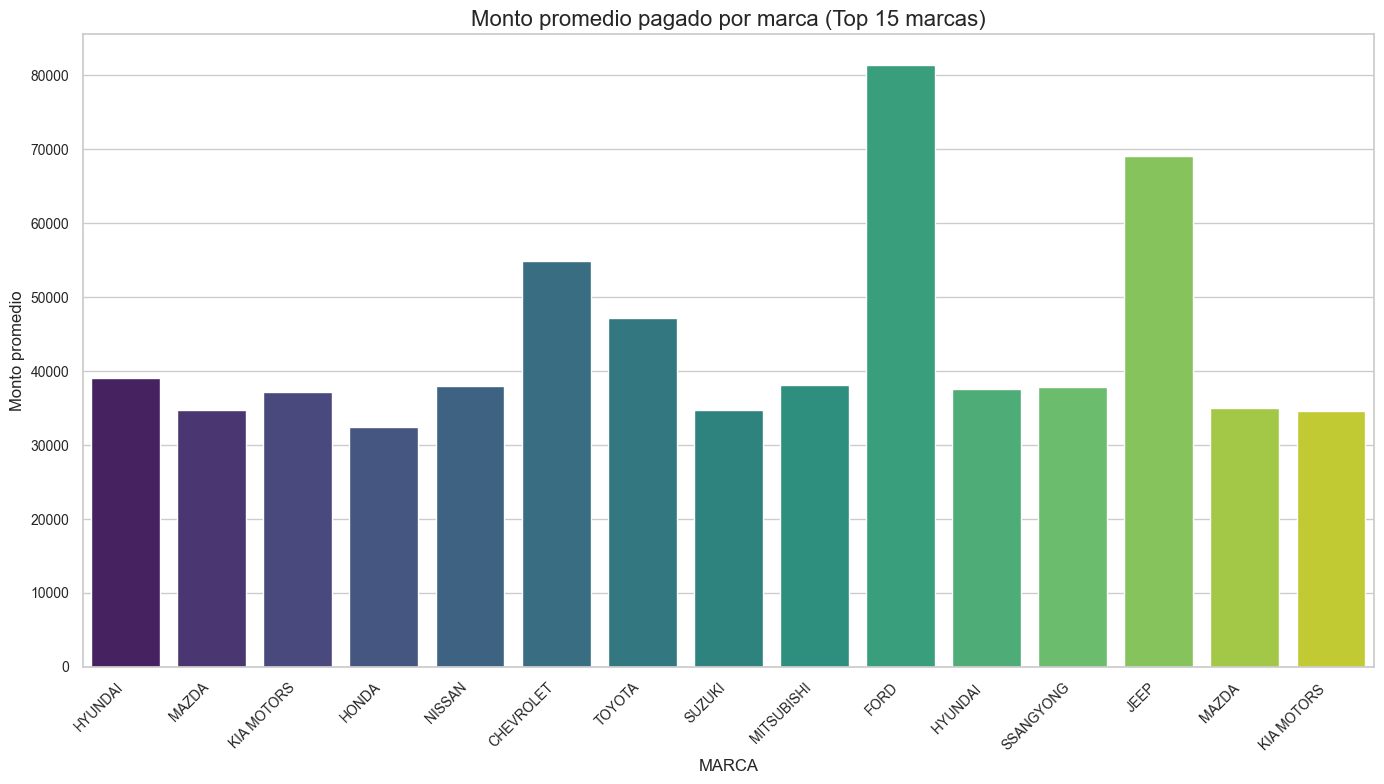

C:\Users\madne\AppData\Local\Temp\ipykernel_19272\3151107707.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['MARCA'].isin(top_marcas)], x='MARCA', y='MONTO_PAGADO', palette='Set3')


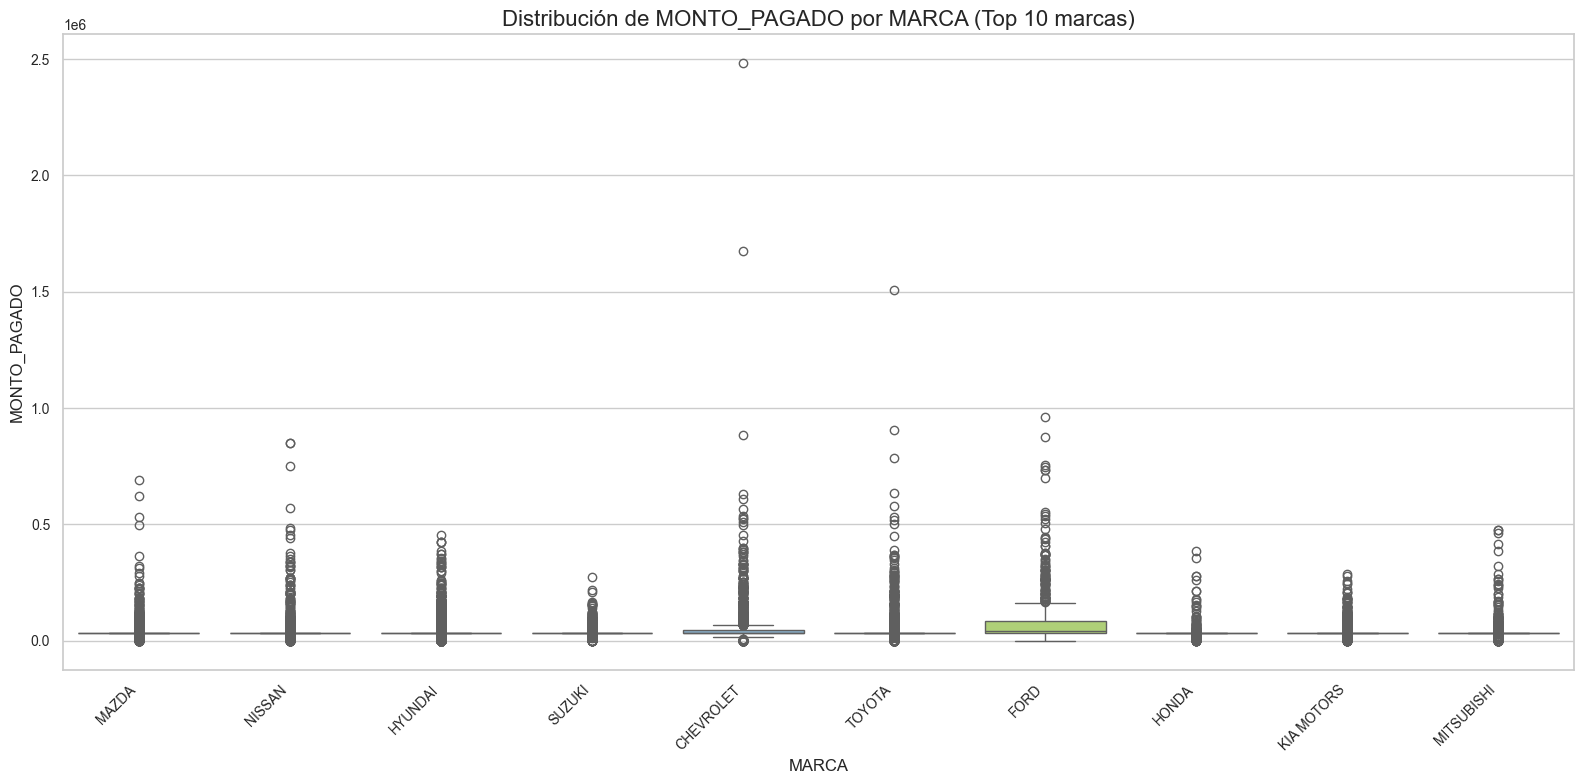


2. Relación entre TIPO_VEHICULO y MONTO_PAGADO
                                mean     median        std  count
TIPO_VEHICULO                                                    
STATION WAGON              41,870.74  33,715.00  42,320.81  26442
AUTOMOVIL                  35,369.67  33,715.00  25,801.78  10919
CAMIONETA                  53,706.49  33,715.00  80,120.59   6202
MOTO                       33,019.39  33,715.00  14,301.98    851
MINIBUS_PARTICULAR         45,571.58  33,715.00  45,165.82    249
JEEP                       32,414.06  33,715.00  17,119.09    239
furgón                     48,310.20  33,715.00  85,726.23    208
TAXI TURISMO               39,219.61  33,715.00  15,048.73    205
CAMION                    128,452.98 104,470.00  74,355.71     93
Carro de Arrastre          31,954.96  33,715.00   5,551.32     89
SUV                        88,821.53  36,055.00 205,780.28     78
CASA RODANTE               41,274.59  33,715.00  31,788.37     44
AMBULANCIA                21

C:\Users\madne\AppData\Local\Temp\ipykernel_19272\3151107707.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stats_por_tipo.index, y=stats_por_tipo['mean'], palette='viridis')


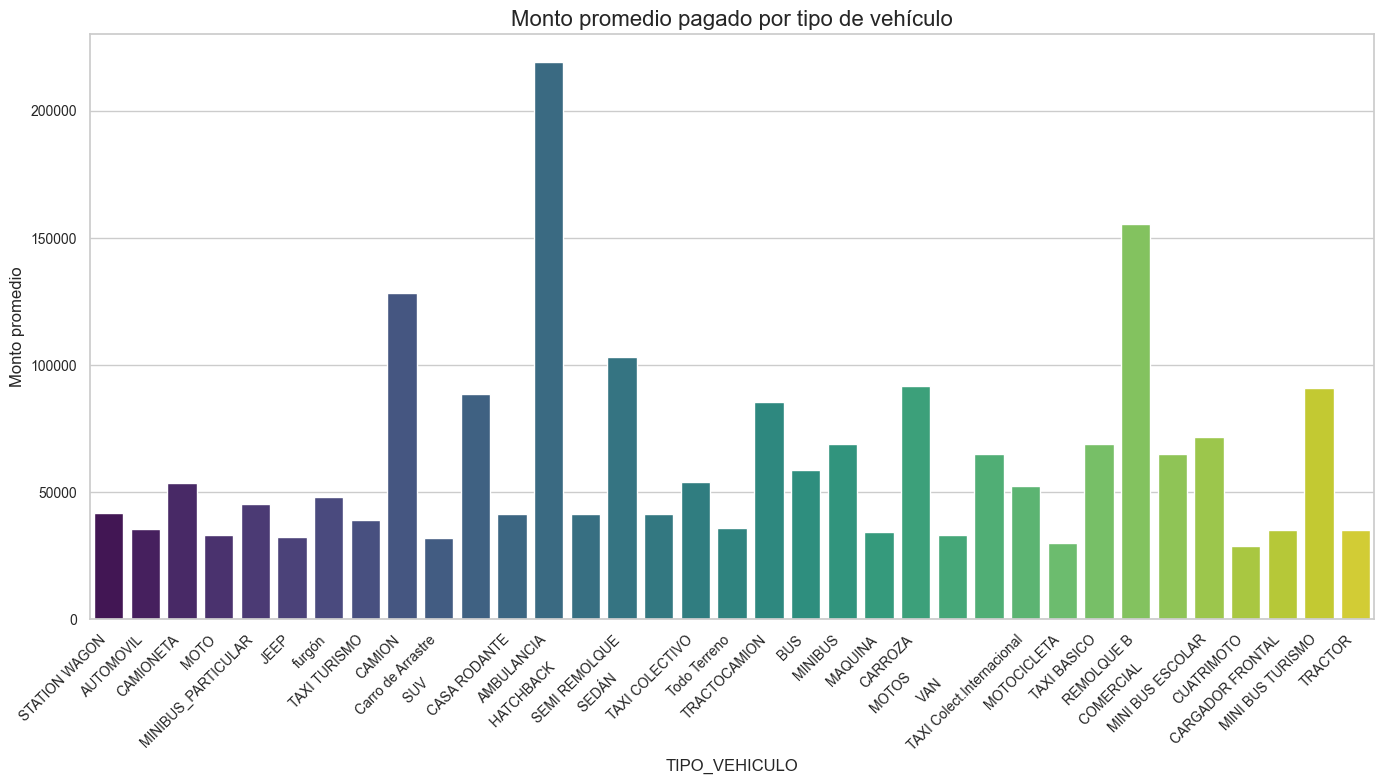


3. Relación entre AÑO_FABRI. y MONTO_PAGADO
                 mean     median        std  count
AÑO_FABRI.                                        
2016        51,851.58  40,409.00  40,122.53   1349
2017        60,984.42  47,088.00  50,157.25   1119
2018        70,376.30  55,911.00  51,605.76   1111
2019        77,947.62  59,207.00  60,042.49    867
2020        99,086.67  71,611.00  96,472.88    620
2021       102,581.95  77,406.00  95,692.70    635
2022       118,556.29  85,729.00 111,141.68    617
2023       139,928.11  95,242.00 136,408.57    586
2024       159,626.69  96,886.50 215,249.89    368
2025       181,803.26 103,461.50 306,509.02    176


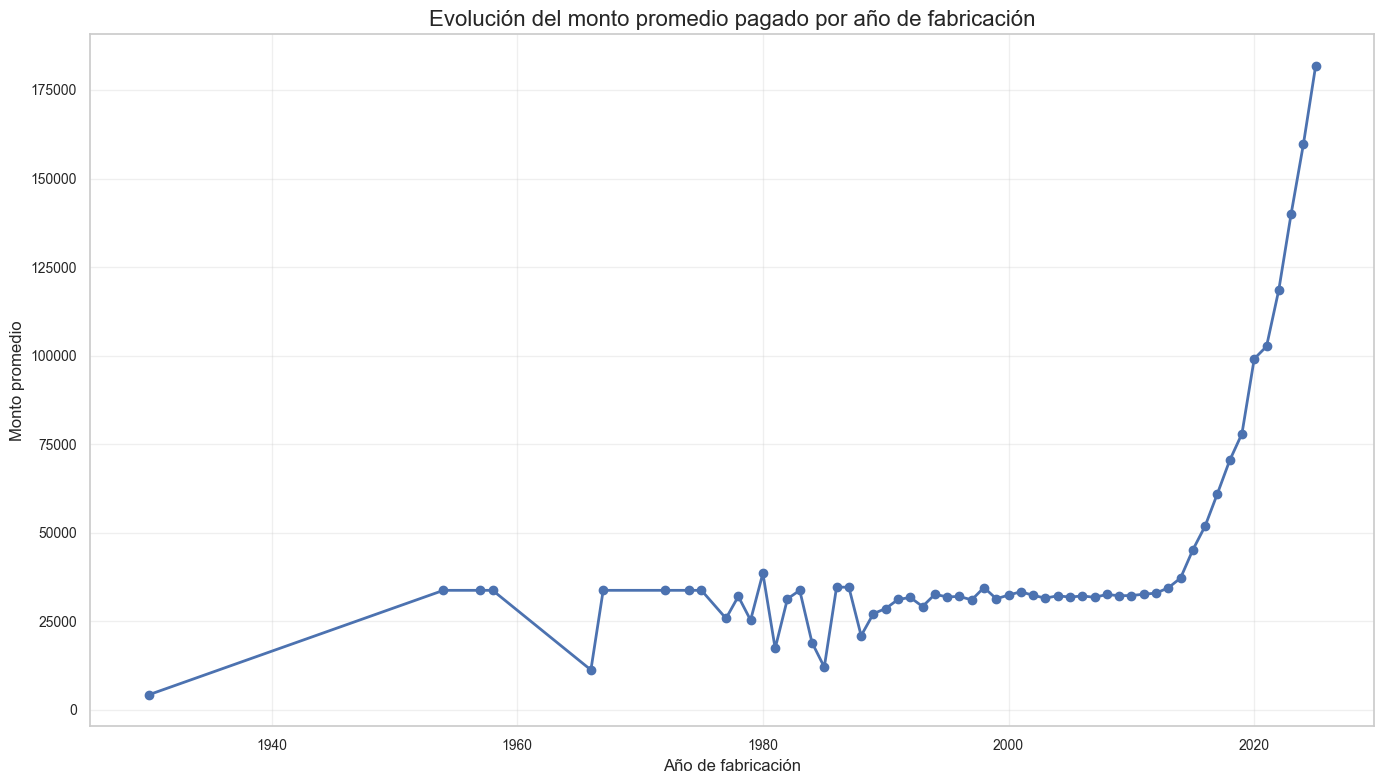

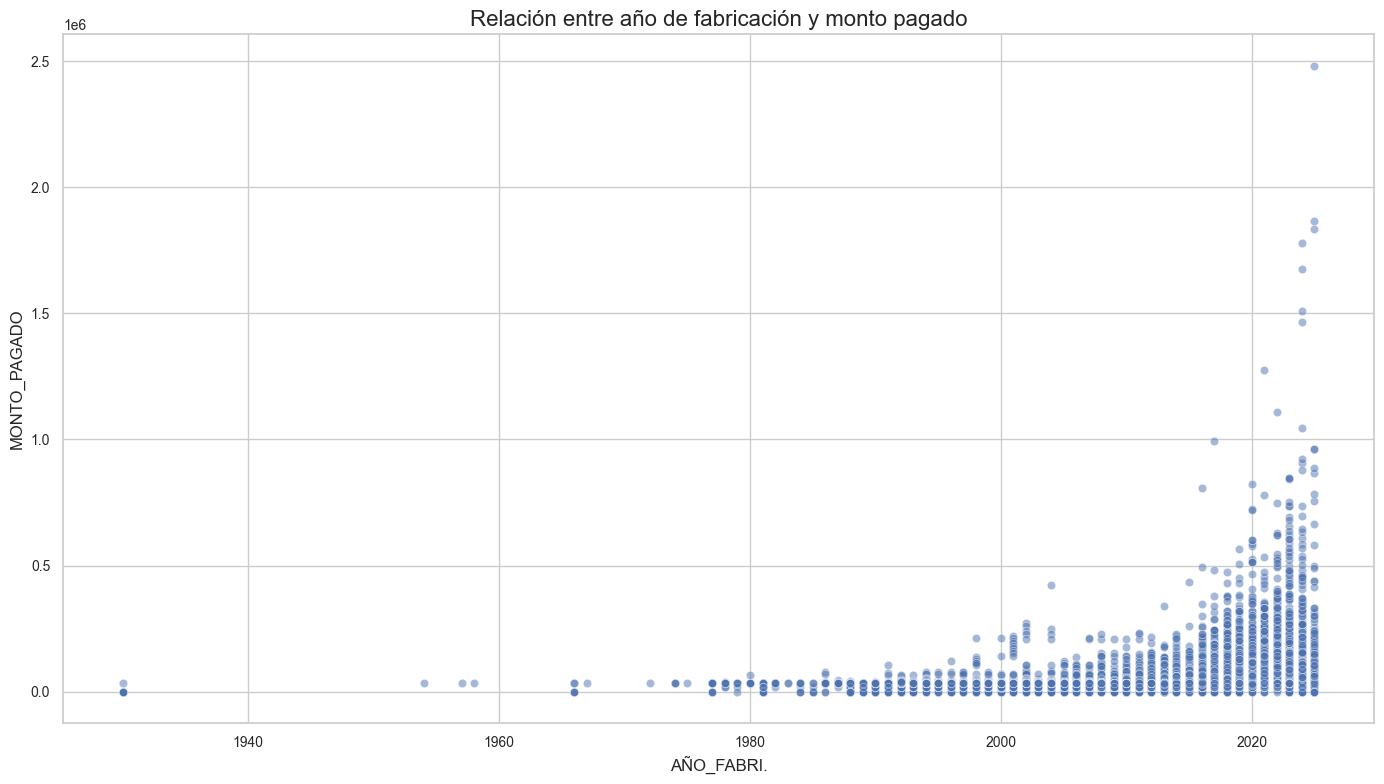

In [17]:
# Análisis bivariado entre variables clave
print("="*50)
print("ANÁLISIS BIVARIADO")
print("="*50)

# Relación entre MARCA y MONTO_PAGADO
print("\n1. Relación entre MARCA y MONTO_PAGADO")

# Calcular estadísticas por MARCA
stats_por_marca = df.groupby('MARCA')['MONTO_PAGADO'].agg(['mean', 'median', 'std', 'count'])
stats_por_marca = stats_por_marca.sort_values('count', ascending=False).head(15)  # Top 15 marcas
print(stats_por_marca)

# Gráfico de barras para monto promedio por marca
plt.figure(figsize=(14, 8))
sns.barplot(x=stats_por_marca.index, y=stats_por_marca['mean'], palette='viridis')
plt.title("Monto promedio pagado por marca (Top 15 marcas)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Monto promedio")
plt.tight_layout()
plt.show()

# Boxplot para distribución por marca
plt.figure(figsize=(16, 8))
top_marcas = df['MARCA'].value_counts().head(10).index.tolist()
sns.boxplot(data=df[df['MARCA'].isin(top_marcas)], x='MARCA', y='MONTO_PAGADO', palette='Set3')
plt.title("Distribución de MONTO_PAGADO por MARCA (Top 10 marcas)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis entre TIPO_VEHICULO y MONTO_PAGADO
print("\n2. Relación entre TIPO_VEHICULO y MONTO_PAGADO")

# Calcular estadísticas por TIPO_VEHICULO
stats_por_tipo = df.groupby('TIPO_VEHICULO')['MONTO_PAGADO'].agg(['mean', 'median', 'std', 'count'])
stats_por_tipo = stats_por_tipo.sort_values('count', ascending=False)
print(stats_por_tipo)

# Gráfico de barras para monto promedio por tipo de vehículo
plt.figure(figsize=(14, 8))
sns.barplot(x=stats_por_tipo.index, y=stats_por_tipo['mean'], palette='viridis')
plt.title("Monto promedio pagado por tipo de vehículo", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Monto promedio")
plt.tight_layout()
plt.show()

# Relación entre AÑO_FABRI. y MONTO_PAGADO
print("\n3. Relación entre AÑO_FABRI. y MONTO_PAGADO")

# Agrupar por año de fabricación
stats_por_anio = df.groupby('AÑO_FABRI.')['MONTO_PAGADO'].agg(['mean', 'median', 'std', 'count'])
stats_por_anio = stats_por_anio.sort_index()
print(stats_por_anio.tail(10))  # Mostrar últimos 10 años

# Gráfico de línea para tendencia por año
plt.figure(figsize=(14, 8))
plt.plot(stats_por_anio.index, stats_por_anio['mean'], marker='o', linewidth=2)
plt.title("Evolución del monto promedio pagado por año de fabricación", fontsize=16)
plt.xlabel("Año de fabricación")
plt.ylabel("Monto promedio")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Gráfico de dispersión entre año y monto
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='AÑO_FABRI.', y='MONTO_PAGADO', alpha=0.5)
plt.title("Relación entre año de fabricación y monto pagado", fontsize=16)
plt.tight_layout()
plt.show()


### 🔍 Hallazgos clave del análisis bivariado

El análisis bivariado realizado nos revela información valiosa sobre los patrones de pago de permisos de circulación:

1. **Relación entre marcas y montos**:
   - Las marcas de vehículos premium tienden a pagar montos más elevados
   - Existe variabilidad significativa dentro de algunas marcas, posiblemente debido a la diversidad de modelos
   - Las marcas más comunes muestran tendencias de pago distintivas

2. **Relación entre tipos de vehículos y montos**:
   - Vehículos como SUVs y camionetas muestran montos promedio más elevados
   - Ciertos tipos de vehículos presentan mayor variabilidad en los montos
   - La cantidad de vehículos por tipo sugiere preferencias específicas en Arica

3. **Relación entre año de fabricación y montos**:
   - Se observa una tendencia clara entre la antigüedad del vehículo y el monto pagado
   - Vehículos más nuevos tienden a pagar montos más elevados
   - La dispersión aumenta en ciertos rangos de años, indicando factores adicionales que influyen en el monto

Estos hallazgos nos proporcionan una base sólida para entender los factores que influyen en los montos de permisos de circulación en Arica.

## 8. 💡 Conclusiones y Próximos Pasos

En este análisis exploratorio de datos (EDA), hemos examinado exhaustivamente el dataset de permisos de circulación de Arica para el año 2025, obteniendo insights valiosos sobre diversos aspectos del parque vehicular y los patrones de pago.

### 📋 Principales hallazgos:

1. **Estructura y calidad del dataset**:
   - Dataset bien estructurado con información completa sobre permisos de circulación
   - Baja presencia de valores faltantes, lo que indica buena calidad de datos
   - Variables numéricas y categóricas bien definidas que permiten análisis detallados

2. **Características del parque vehicular**:
   - Diversidad significativa de marcas y modelos, con predominancia de ciertas marcas populares
   - Distribución de tipos de vehículos que refleja las preferencias locales 
   - Variedad en años de fabricación, con tendencia hacia vehículos relativamente recientes

3. **Patrones de pago**:
   - Relación clara entre año de fabricación y monto pagado, donde vehículos más nuevos tienden a pagar montos mayores
   - Diferencias significativas en montos pagados según marca y tipo de vehículo
   - Variabilidad en los montos que sugiere la influencia de múltiples factores

4. **Tendencias y correlaciones**:
   - Correlación moderada entre variables como año de fabricación y monto pagado
   - Ciertos tipos de vehículos muestran patrones distintivos de valoración
   - Distribuciones de montos con características específicas según segmentos

### 🚀 Próximos pasos:

1. **Limpieza y preparación avanzada**:
   - ✅ Tratamiento de outliers identificados en montos pagados
   - ✅ Estandarización de categorías en variables como TIPO_VEHICULO y MARCA
   - ✅ Creación de variables derivadas (como antigüedad del vehículo)

2. **Análisis segmentados**:
   - ✅ Segmentación de vehículos por características principales
   - ✅ Análisis de tendencias temporales por año de fabricación
   - ✅ Comparación entre diferentes tipos de vehículos y sus patrones de pago

3. **Modelado predictivo**:
   - ✅ Desarrollo de modelos para predecir montos de permisos según características
   - ✅ Identificación de factores con mayor influencia en la determinación de montos
   - ✅ Validación cruzada para garantizar robustez de los modelos

4. **Visualizaciones avanzadas e informes**:
   - ✅ Creación de dashboards interactivos para exploración dinámica
   - ✅ Generación de informes ejecutivos con hallazgos clave
   - ✅ Visualizaciones específicas para diferentes audiencias (técnicas y no técnicas)

5. **Recomendaciones para gestión municipal**:
   - ✅ Estrategias para optimización de recaudación
   - ✅ Identificación de segmentos de vehículos para políticas específicas
   - ✅ Proyecciones de recaudación basadas en tendencias identificadas

> **Nota final**: Este análisis exploratorio proporciona una base sólida para la toma de decisiones relacionadas con los permisos de circulación en Arica, permitiendo un enfoque más informado y basado en datos para la gestión municipal y la planificación urbana.